#  LAB | Imbalanced data

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter


In [2]:
churn = pd.read_csv('customer_churn.csv')

In [3]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
churn.dtypes
#churn['SeniorCitizen'].unique() #SeniorCitizen is binary #It could be considered categorical
#churn['MultipleLines'].unique() #MultipleLines is binary #This column should be cleaned > 'No phone service' replaced by 'No'
#churn['InternetService'].unique() #InternetService has 3 different values - 'DSL', 'Fiber optic', 'No'
#churn['OnlineSecurity'].unique() #OnlineSecurity has 3 different values - 'No', 'Yes', 'No internet service'
#churn['OnlineBackup'].unique() #OnlineBackup has 3 different values - 'Yes', 'No', 'No internet service'
#churn['DeviceProtection'].unique() #DeviceProtection has 3 different values - 'Yes', 'No', 'No internet service'
#churn['TechSupport'].unique() #DeviceProtection has 3 different values - 'Yes', 'No', 'No internet service'
#churn['StreamingTV'].unique() #StreamingTV has 3 different values - 'Yes', 'No', 'No internet service'
#churn['Contract'].unique() #Contract has 3 different values - 'Month-to-month', 'One year', 'Two year'
#churn['PaperlessBilling'].unique() #PaperlessBilling has 2 different values - 'Yes', 'No'
#churn['PaymentMethod'].unique() #There are 4 different payment methods - 'Electronic check', 'Mailed check', 'Bank transfer (automatic)',
                                 #'Credit card (automatic)'
#churn['MonthlyCharges'].max()-churn['MonthlyCharges'].min() #range=100.5
#total charges should be a float
#churn['Churn'].nunique() #Churn gets values 'Yes' or 'No'
#churn.isna().sum() #There's no missing values in the DataFrame 'churn'

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

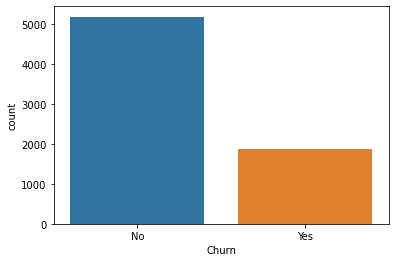

In [5]:
#Check churn data ('Yes','No')
sns.countplot(x='Churn', data=churn);

In [6]:
# X/y split
X = churn.loc[:,['tenure','SeniorCitizen','MonthlyCharges']]
y = churn['Churn']

<AxesSubplot:>

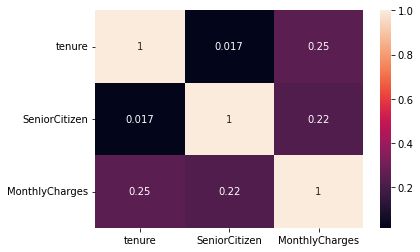

In [7]:
#Check correlation between independent variables
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)

In [8]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [9]:
#Scale the independent variables
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train) #np array
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index) 
#index=X_train.index -- places the same index as the X_train.index
# because this is the only tranformation we apply to the numerics, we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index) #DataFrame
X_train_scaled

,tenure,SeniorCitizen,MonthlyCharges
2420,-1.161504,-0.437321,-0.876676
1341,-1.202241,-0.437321,-0.340171
3646,0.264289,-0.437321,0.563418
5215,-0.998556,-0.437321,-1.487927
2390,-0.998556,-0.437321,-1.499554
...,...,...,...
1293,1.404923,-0.437321,1.536769
4023,0.386500,-0.437321,-1.499554
5200,1.527134,-0.437321,1.380634
3775,0.345763,2.286651,1.111551


In [14]:
lr = LogisticRegression(random_state=11, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

lr.predict_proba(X_train_scaled) #Churn probability

array([[0.70079379, 0.29920621],
       [0.57055547, 0.42944453],
       [0.80245217, 0.19754783],
       ...,
       [0.91106514, 0.08893486],
       [0.590325  , 0.409675  ],
       [0.99398803, 0.00601197]])

In [15]:
#Compute the log 
#Logits - function that maps probabilities between 0 and 1 to a real number between negative and positive infinity
#It's a vector of raw predictions that a classification model generates. 
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))
logits

array([-0.85108069, -0.28411781, -1.4016915 , ..., -2.32671015,
       -0.36530907, -5.10797196])

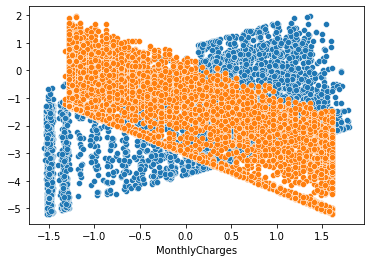

In [16]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);

In [17]:
#Evaluate the model
#Accuracy can be calculated as score = LogisticRegression.score(X_test, y_test)
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.79


#Even a simple model will give us more than 70% accuracy. Why?

Logistic Regression Model is a binary classification model with outputs between 0 and 1 (2 values).
Therefore, there's a high probability to predict an outcome correctly.

In [27]:
#Evaluate the model
#precision, recall, f1, kappa

y_pred_test = lr.predict(X_test_scaled)


print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test,pos_label='No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test,pos_label='No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test,pos_label='No')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The precision in the TEST set is: 0.72
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.84
The Kappa in the TEST set is: 0.00


In [30]:
#Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 
#Apply imblearn.over_sampling.SMOTE to the dataset. 
#Build and evaluate the logistic regression model. Is it there any improvement?

ros = RandomOverSampler(random_state=11) #fix the random seed to be able to duplicate the sample

X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())


,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-1.161504,-0.437321,-0.876676,No
1,-1.202241,-0.437321,-0.340171,Yes
2,0.264289,-0.437321,0.563418,No
3,-0.998556,-0.437321,-1.487927,Yes
4,-0.998556,-0.437321,-1.499554,No


Resampled dataset shape Counter({'No': 3898, 'Yes': 3898})
No     3898
Yes    3898
Name: Churn, dtype: int64


In [32]:
#Evaluate the model after SMOTE

lr = LogisticRegression(max_iter=1000) #defautl value of max_iter = 300 #iterations to improve the model
lr.fit(X_train_over, y_train_over)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test,pos_label='No')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test,pos_label='No')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test,pos_label='No')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.73
The precision in the TEST set is: 0.88
The recall in the TEST set is: 0.73
The F1 in the TEST set is: 0.80
The Kappa in the TEST set is: 0.41


Every performance metric improved after applying the sampling technique.
Accuracy - overall correct prediction is 73% (TP+TN/Total)
Precision - if there's churn, the model is 88% correct in predicting it considering total positive churn predicted (TP/TP+FP)
Recall - if there's churn, the model is 73% correct in predicting it considering true and positive predictions for positive churn (TP/TP+FN)
F1 - 80% able to capture positive cases(recall) and accurate in the predictions it does capture (precision) (2(Precision*Recall/Precision+Recall))
Kappa - The maximum Cohen’s kappa value represents the case of either the number of false negatives or false positives in the confusion matrix being zero.

